In [13]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
# fix seed
np.random.seed(42)

In [15]:
dataset_name = 'extra2.csv'

In [16]:
data = pd.read_csv(dataset_name)
drop_pb = 0.3
mask = np.random.choice([True, False], size=data.shape, p=[drop_pb, 1-drop_pb])
mask[:,-1] = 0
data[mask] = np.nan

In [17]:
data.head()

,age,sex,fbs,exang,cp,trestbps,chol,restceg,thalach,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.0,0.0,NaN,NaN,NaN,1.0,0.603053,0.370968,NaN,0.000000,0.5,0
1,NaN,NaN,0.0,1.0,1.000000,NaN,0.365297,NaN,NaN,0.241935,0.5,1.000000,NaN,1
2,0.791667,NaN,0.0,NaN,NaN,0.245283,0.235160,1.0,0.442748,NaN,0.5,0.666667,NaN,1
3,NaN,1.0,NaN,0.0,0.666667,0.339623,0.283105,NaN,0.885496,0.564516,1.0,0.000000,0.0,0
4,NaN,NaN,NaN,0.0,0.333333,NaN,0.178082,1.0,NaN,0.225806,NaN,0.000000,NaN,0


In [18]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
feature_names = train_data.columns[:-1]

In [20]:
print("Feature names: ", feature_names)

Feature names:  Index(['age', 'sex', 'fbs', 'exang', 'cp', 'trestbps', 'chol', 'restceg',
       'thalach', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [21]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = train_data

print("Dataset Summary:")
print("Number of instances:", df.shape[0])
print("Number of features:", df.shape[1] - 1) 
print("Number of NaN values:", df.isnull().sum().sum())
print("\nSummary for  Features:")
for column in df.columns[:-1]: 
    print(column, " has NaNs:", df[column].isnull().sum())
    

#smmary of target
print("\nSummary for Prognosis:")
print(df[df.columns[-1]].value_counts())
print("No of NaN values:", df[df.columns[-1]].isnull().sum())

Dataset Summary:
Number of instances: 242
Number of features: 13
Number of NaN values: 966

Summary for  Features:
age  has NaNs: 76
sex  has NaNs: 77
fbs  has NaNs: 77
exang  has NaNs: 78
cp  has NaNs: 52
trestbps  has NaNs: 70
chol  has NaNs: 78
restceg  has NaNs: 63
thalach  has NaNs: 71
oldpeak  has NaNs: 70
slope  has NaNs: 84
ca  has NaNs: 83
thal  has NaNs: 87

Summary for Prognosis:
target
0    135
1    107
Name: count, dtype: int64
No of NaN values: 0


In [24]:
df.head()

,age,sex,fbs,exang,cp,trestbps,chol,restceg,thalach,oldpeak,slope,ca,thal,target
132,0.000000,1.0,NaN,0.0,0.333333,0.339623,0.178082,NaN,1.000000,0.000000,0.0,0.000000,0.0,0
202,0.583333,NaN,1.0,0.0,NaN,NaN,0.000000,0.0,0.778626,NaN,0.0,0.333333,1.0,0
196,0.833333,1.0,1.0,NaN,0.000000,0.622642,0.246575,1.0,NaN,0.016129,0.5,NaN,0.0,0
75,0.750000,0.0,0.0,0.0,0.666667,0.622642,0.534247,1.0,0.610687,0.129032,0.0,0.000000,0.0,0
176,0.479167,NaN,1.0,NaN,1.000000,0.132075,NaN,0.0,0.580153,0.016129,0.0,1.000000,NaN,0


In [25]:
class Sim():
    def __init__(self,cls,X_train,y_train,X_test,y_test):
        self.cls = cls
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
        self.X_test = X_test
        self.y_test = y_test
        # print("Setting NaN values to 0 : ",self.X_train.isnull().sum().sum()+self.X_test.isnull().sum().sum())
        self.X_train.fillna(0.,inplace=True)
        self.X_test.fillna(0.,inplace=True)  
        self.cls.fit(self.X_train,self.y_train)
        self.y_pred = self.cls.predict(self.X_test)
        
    def eval(self):
        return classification_report(self.y_test,self.y_pred,output_dict=True)

In [26]:
clfs = [tree.DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB()]


In [27]:
X_train_1 = X_train.copy()
X_train_1.fillna(0.,inplace=True)
A = X_train_1.T.dot(X_train_1)
A.shape

(13, 13)

In [28]:
A

,age,sex,fbs,exang,cp,trestbps,chol,restceg,thalach,oldpeak,slope,ca,thal
age,56.843750,40.500000,8.916667,20.687500,49.062500,24.568396,17.460474,32.958333,35.814885,11.713374,20.062500,14.979167,22.281250
sex,40.500000,110.000000,9.000000,39.000000,65.666667,26.877358,18.826484,35.000000,46.190840,14.870968,22.000000,14.000000,34.500000
fbs,8.916667,9.000000,24.000000,5.000000,11.000000,6.698113,4.844749,11.000000,12.335878,2.919355,4.000000,5.666667,9.000000
exang,20.687500,39.000000,5.000000,56.000000,39.666667,14.122642,9.584475,22.500000,23.503817,10.112903,17.000000,12.333333,25.000000
cp,49.062500,65.666667,11.000000,39.666667,112.555556,30.968553,24.493151,45.833333,55.363868,19.930108,30.166667,20.222222,40.500000
trestbps,24.568396,26.877358,6.698113,14.122642,30.968553,26.285333,12.786530,23.094340,24.070791,8.059951,13.377358,9.836478,15.957547
chol,17.460474,18.826484,4.844749,9.584475,24.493151,12.786530,14.949433,18.611872,20.098243,5.759317,9.170091,7.287671,9.896119
restceg,32.958333,35.000000,11.000000,22.500000,45.833333,23.094340,18.611872,86.250000,39.354962,13.500000,21.000000,14.000000,24.500000
thalach,35.814885,46.190840,12.335878,23.503817,55.363868,24.070791,20.098243,39.354962,65.364431,12.150825,20.091603,13.460560,23.293893
oldpeak,11.713374,14.870968,2.919355,10.112903,19.930108,8.059951,5.759317,13.500000,12.150825,11.503122,9.870968,4.220430,11.096774


In [29]:
def normalize_adj(adj):
    adj = adj - np.diag(np.diag(adj))
    adj = np.array(adj,dtype=np.complex64)
    rowsum = np.sum(adj, axis=1)
    rowsum = np.array(rowsum)
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_mat_inv_sqrt = np.diag(d_inv_sqrt)
    ret = adj.dot(d_mat_inv_sqrt).T.dot(d_mat_inv_sqrt)
    ret = np.real(ret)
    return ret

A1 = normalize_adj(A)

In [30]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(A1, index=A.index, columns=A.columns)

,age,sex,fbs,exang,cp,trestbps,chol,restceg,thalach,oldpeak,slope,ca,thal
age,0.00,0.12,0.05,0.08,0.14,0.10,0.08,0.11,0.11,0.06,0.08,0.07,0.08
sex,0.12,0.00,0.05,0.13,0.16,0.10,0.08,0.11,0.13,0.07,0.08,0.06,0.12
fbs,0.05,0.05,0.00,0.03,0.06,0.05,0.04,0.07,0.07,0.03,0.03,0.05,0.06
exang,0.08,0.13,0.03,0.00,0.12,0.06,0.05,0.08,0.08,0.06,0.08,0.07,0.10
cp,0.14,0.16,0.06,0.12,0.00,0.10,0.09,0.13,0.15,0.09,0.11,0.08,0.13
trestbps,0.10,0.10,0.05,0.06,0.10,0.00,0.07,0.09,0.09,0.05,0.07,0.06,0.07
chol,0.08,0.08,0.04,0.05,0.09,0.07,0.00,0.09,0.09,0.04,0.05,0.05,0.05
restceg,0.11,0.11,0.07,0.08,0.13,0.09,0.09,0.00,0.13,0.07,0.09,0.07,0.09
thalach,0.11,0.13,0.07,0.08,0.15,0.09,0.09,0.13,0.00,0.06,0.08,0.06,0.08
oldpeak,0.06,0.07,0.03,0.06,0.09,0.05,0.04,0.07,0.06,0.00,0.06,0.03,0.06


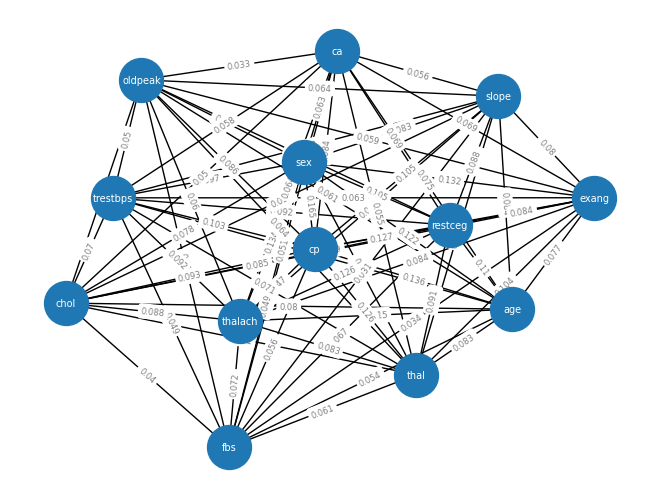

In [31]:
# create a graph between all features using networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_numpy_array(A1)
G = nx.relabel_nodes(G, dict(enumerate(feature_names)))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True,node_size=1000, font_size=7, font_color='white')
labels = nx.get_edge_attributes(G, 'weight')
labels = {k: round(v, 3) for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6, alpha=0.5) 
plt.show()

In [32]:
# apply LPA to find NaN values
class LPA():
    def __init__(self,adj,features,iters = 10,alpha = 0.5):
        self.adj = adj
        self.features = features
        self.true_mask = ~np.isnan(self.features)
        self.features[~self.true_mask] = 0
        self.iters = iters
        self.alpha = alpha
    
    def propagate(self):
        ret = self.features.copy()
        for i in range(self.iters):
            ret = self.alpha*ret.dot(self.adj) + (1-self.alpha)*self.features
        return ret

In [33]:
# apply LPA to find NaN values
# find train and test matrices with NaN values filled
X = np.concatenate((X_train,X_test),axis=0)
lpa = LPA(A1,X)
X_filled = lpa.propagate()
X_train_filled = X_filled[:X_train.shape[0]]
X_test_filled = X_filled[X_train.shape[0]:]
# convert to pandas
X_train_filled = pd.DataFrame(X_train_filled,columns=feature_names)
X_test_filled = pd.DataFrame(X_test_filled,columns=feature_names)

In [34]:
df = pd.DataFrame(columns=['Classifier','Original Accuracy','Filled Accuracy', 'Original F1-score','Filled F1-score', 'Original Precision','Filled Precision', 'Original Recall','Filled Recall'])  
for clf in clfs:
    s = Sim(clf,X_train,y_train,X_test,y_test)
    s_filled = Sim(clf,X_train_filled,y_train,X_test_filled,y_test)
    res1 = s.eval()
    res2 = s_filled.eval()
    df.loc[len(df)] = [str(clf),res1['accuracy'],res2['accuracy'],res1['macro avg']['f1-score'],res2['macro avg']['f1-score'],res1['macro avg']['precision'],res2['macro avg']['precision'],res1['macro avg']['recall'],res2['macro avg']['recall']]

In [35]:
print(dataset_name)
df

extra2.csv


,Classifier,Original Accuracy,Filled Accuracy,Original F1-score,Filled F1-score,Original Precision,Filled Precision,Original Recall,Filled Recall
0,DecisionTreeClassifier(),0.70,0.77,0.70,0.77,0.70,0.77,0.70,0.77
1,RandomForestClassifier(),0.84,0.75,0.84,0.75,0.84,0.77,0.84,0.76
2,KNeighborsClassifier(),0.82,0.84,0.82,0.83,0.85,0.87,0.83,0.84
3,GaussianNB(),0.85,0.80,0.85,0.80,0.85,0.81,0.85,0.81


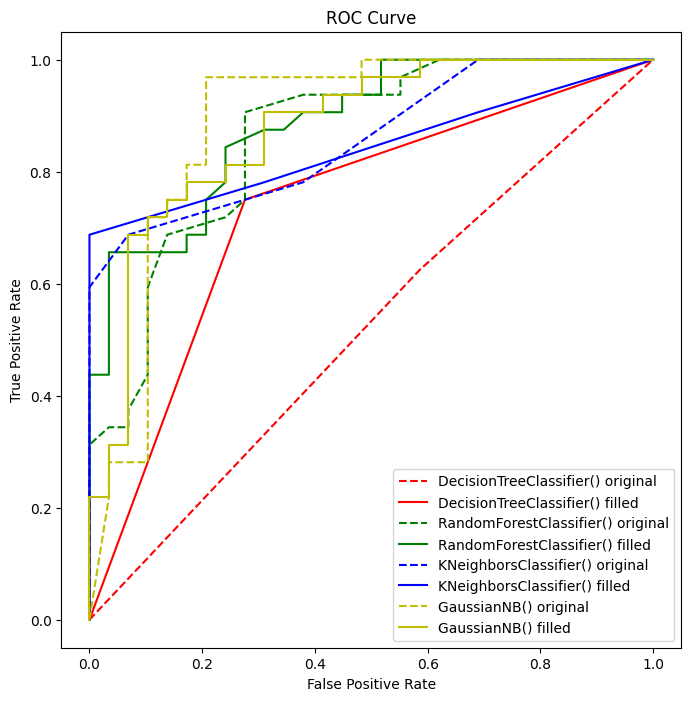

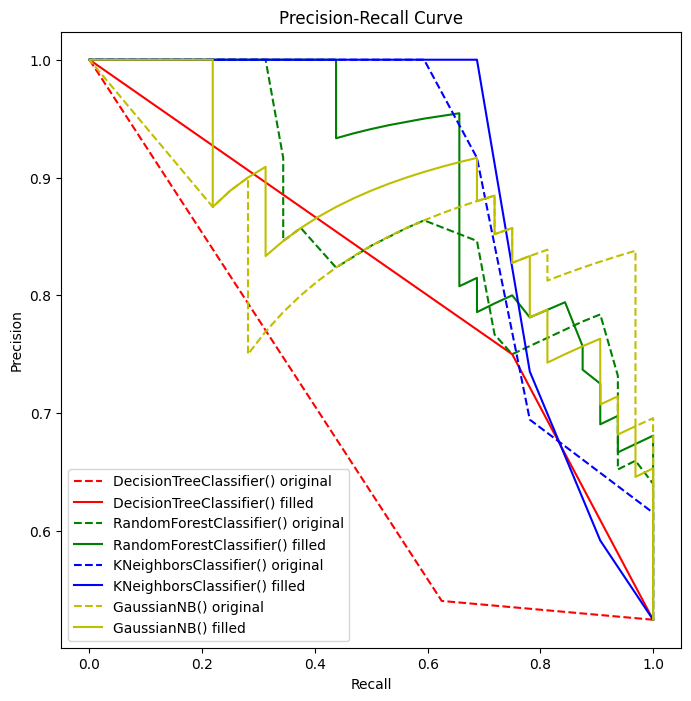

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

roc = []
pr = []

roc_filled = []
pr_filled = []

for clf in clfs:
    s = Sim(clf,X_train,y_train,X_test,y_test)
    s_filled = Sim(clf,X_train_filled,y_train,X_test_filled,y_test)
    y_score = s.cls.predict_proba(X_test)
    y_score_filled = s_filled.cls.predict_proba(X_test_filled)
    fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
    roc.append([fpr,tpr])
    fpr, tpr, _ = roc_curve(y_test, y_score_filled[:,1])
    roc_filled.append([fpr,tpr])
    precision, recall, _ = precision_recall_curve(y_test, y_score[:,1])
    pr.append([precision,recall])
    precision, recall, _ = precision_recall_curve(y_test, y_score_filled[:,1])
    pr_filled.append([precision,recall])

colors = ['r','g','b','y']
plt.figure(figsize=(8,8))
for i in range(len(clfs)):
    fpr,tpr = roc[i]
    plt.plot(fpr, tpr, color=colors[i], linestyle='--', label=str(clfs[i])+' original')
    fpr,tpr = roc_filled[i]
    plt.plot(fpr, tpr, color=colors[i], label=str(clfs[i])+' filled')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

plt.figure(figsize=(8,8))
colors = ['r','g','b','y']
for i in range(len(clfs)):
    precision,recall = pr[i]
    plt.plot(recall, precision, color=colors[i], linestyle='--', label=str(clfs[i])+ ' original')
    precision,recall = pr_filled[i]
    plt.plot(recall, precision, color=colors[i], label=str(clfs[i])+' filled')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.legend()
plt.show()
